<a href="https://colab.research.google.com/github/Andribi/A2MF_AP/blob/main/DataAnalysisUTKFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTS

import os 
import pandas as pd 
import matplotlib.pyplot as plt
import json 
import numpy as np

In [2]:
# CLONE OF REPOSITORY WITH DATASETS

!git clone https://github.com/Andribi/A2MF_AP.git 

Cloning into 'A2MF_AP'...
remote: Enumerating objects: 218437, done.
remote: Counting objects: 100% (23313/23313), done.
remote: Compressing objects: 100% (23311/23311), done.
remote: Total 218437 (delta 13), reused 23291 (delta 2), pack-reused 195124
Receiving objects: 100% (218437/218437), 1.91 GiB | 38.43 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Checking out files: 100% (219079/219079), done.


In [3]:
# GLOBAL VARS

UTKFACE_LABELS_PATH = '/content/A2MF_AP/utkface.json'

In [4]:
# CREATE DATAFRAME

with open(UTKFACE_LABELS_PATH) as utkface:
    utkface_dict = json.load(utkface)

utkface_df = pd.DataFrame.from_dict(utkface_dict, orient='index')
utkface_df.head(5)

,age,gender,race
100_0_0_20170112213500903.jpg.chip.jpg,100,0,0
100_0_0_20170112215240346.jpg.chip.jpg,100,0,0
100_1_0_20170110183726390.jpg.chip.jpg,100,1,0
100_1_0_20170112213001988.jpg.chip.jpg,100,1,0
100_1_0_20170112213303693.jpg.chip.jpg,100,1,0


In [5]:
# MISSING VALUES

print('Percentage of missing values:', round((utkface_df.isna().sum().sum() / utkface_df.shape[0]) * 100 , 2), '%')
nan_vals = utkface_df[utkface_df.isna().any(axis=1)]
utkface_df = utkface_df.dropna()
print('Percentage of missing values after drop:', round((utkface_df.isna().sum().sum() / utkface_df.shape[0]) * 100 , 2), '%')

Percentage of missing values: 0.01 %
Percentage of missing values after drop: 0.0 %


Total number of images in UTK_Face: 23669


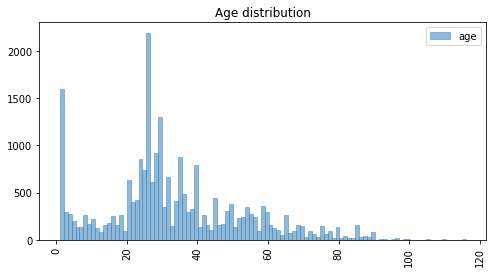

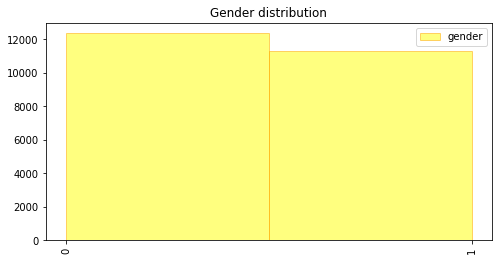

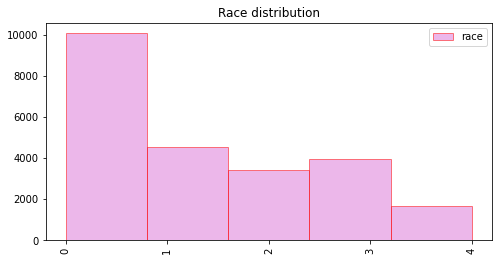

In [6]:
# DISTRIBUTIONS

print('Total number of images in UTK_Face: ' + str(utkface_df.shape[0]))

age = utkface_df["age"].astype(int).sort_values()
age_bins=len(age.value_counts())

gender = utkface_df["gender"].astype(int).sort_values()
gender_bins=len(gender.value_counts())

race = utkface_df["race"].astype(int).sort_values()
race_bins=len(race.value_counts())

age.hist(bins=age_bins, figsize=[8,4], xrot=90, edgecolor='steelblue', linewidth=1, grid=False, alpha=0.5, legend=True)
plt.title('Age distribution')
plt.show()

gender.hist(bins=gender_bins, figsize=[8,4], xrot=90, edgecolor='orange', linewidth=1, grid=False, alpha=0.5, legend=True, color='yellow')
plt.title('Gender distribution')
plt.xticks(np.arange(0, 2, step=1))
plt.show()

race.hist(bins=race_bins, figsize=[8,4], xrot=90, edgecolor='red', linewidth=1, grid=False, alpha=0.5, legend=True, color='orchid')
plt.xticks(np.arange(0, 5, step=1))
plt.title('Race distribution')
plt.show()

In [16]:
# DATASET SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(utkface_df, test_size=0.2)

print('Training samples number:', X_train.shape[0])
print('Testing samples number: ', X_test.shape[0])

Training samples number: 18935
Testing samples number:  4734
